# Ridge Regression Codes

(请参考上次tutor中的学习渠道了解更多细节)

最小二乘法的回归系数结果是$(X^TX)^{-1}X^Ty$

当X不是列满秩时，或者某些列之间的线性相关性比较大时，$X^TX$ 的行列式接近于0，即 接近于奇异，上述问题变为一个不适定问题，此时，$(X^TX)^T$ 计算 时误差会很大，传统的最小二乘法缺乏稳定性与可靠性。

为了解决上述问题，我们需要将不适定问题转化为适定问题：我们为最小二乘法的损失函数加上一个正则化项，变为$$||y - Xw||^2_2 + \alpha * ||w||^2_2$$, $\alpha \geq 0$

然后回归系数的结果成为了$$(X^TX+\alpha I)^{-1}X^Ty$$

## Import Packages

In [49]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Ridge,RidgeCV ###导入岭回归算法
from sklearn.metrics import r2_score
import matplotlib.pyplot as plt

## Collecting Data
数据来源 [here](https://www.kaggle.com/datasets/altavish/boston-housing-dataset). Kaggle Dataset是一个数据集网站。

## Read Data

In [3]:
house_price= pd.read_csv('./HousingData.csv')
print(house_price)

        CRIM    ZN  INDUS  CHAS    NOX     RM   AGE     DIS  RAD  TAX   
0    0.00632  18.0   2.31   0.0  0.538  6.575  65.2  4.0900    1  296  \
1    0.02731   0.0   7.07   0.0  0.469  6.421  78.9  4.9671    2  242   
2    0.02729   0.0   7.07   0.0  0.469  7.185  61.1  4.9671    2  242   
3    0.03237   0.0   2.18   0.0  0.458  6.998  45.8  6.0622    3  222   
4    0.06905   0.0   2.18   0.0  0.458  7.147  54.2  6.0622    3  222   
..       ...   ...    ...   ...    ...    ...   ...     ...  ...  ...   
501  0.06263   0.0  11.93   0.0  0.573  6.593  69.1  2.4786    1  273   
502  0.04527   0.0  11.93   0.0  0.573  6.120  76.7  2.2875    1  273   
503  0.06076   0.0  11.93   0.0  0.573  6.976  91.0  2.1675    1  273   
504  0.10959   0.0  11.93   0.0  0.573  6.794  89.3  2.3889    1  273   
505  0.04741   0.0  11.93   0.0  0.573  6.030   NaN  2.5050    1  273   

     PTRATIO       B  LSTAT  MEDV  
0       15.3  396.90   4.98  24.0  
1       17.8  396.90   9.14  21.6  
2       17.8  3

## Clean Data I 去除null数据

In [4]:
house_price_null=house_price.isnull().sum()
print(house_price_null)

CRIM       20
ZN         20
INDUS      20
CHAS       20
NOX         0
RM          0
AGE        20
DIS         0
RAD         0
TAX         0
PTRATIO     0
B           0
LSTAT      20
MEDV        0
dtype: int64


## Clean Data II（去除NAN数据）

In [5]:
house_price=house_price.dropna().reset_index()
# Drop the rows where at least one element is missing. 
# Then reset the index since some indices are missing after deleting.

# print(house_price)
del house_price["index"] # delete the old index, and use the reset new index.
# print(house_price["index"])
# print(house_price)

In [6]:
# drop the "MEDV" column 将MEDV划分为预测值
# train是变量，MEDV提出作为label训练答案
train=house_price.drop(["MEDV"],axis=1)
print(train)

        CRIM    ZN  INDUS  CHAS    NOX     RM   AGE     DIS  RAD  TAX   
0    0.00632  18.0   2.31   0.0  0.538  6.575  65.2  4.0900    1  296  \
1    0.02731   0.0   7.07   0.0  0.469  6.421  78.9  4.9671    2  242   
2    0.02729   0.0   7.07   0.0  0.469  7.185  61.1  4.9671    2  242   
3    0.03237   0.0   2.18   0.0  0.458  6.998  45.8  6.0622    3  222   
4    0.02985   0.0   2.18   0.0  0.458  6.430  58.7  6.0622    3  222   
..       ...   ...    ...   ...    ...    ...   ...     ...  ...  ...   
389  0.17783   0.0   9.69   0.0  0.585  5.569  73.5  2.3999    6  391   
390  0.22438   0.0   9.69   0.0  0.585  6.027  79.7  2.4982    6  391   
391  0.04527   0.0  11.93   0.0  0.573  6.120  76.7  2.2875    1  273   
392  0.06076   0.0  11.93   0.0  0.573  6.976  91.0  2.1675    1  273   
393  0.10959   0.0  11.93   0.0  0.573  6.794  89.3  2.3889    1  273   

     PTRATIO       B  LSTAT  
0       15.3  396.90   4.98  
1       17.8  396.90   9.14  
2       17.8  392.83   4.03  
3  

## Split Data 将数据划分成训练集和测试集
先随机打乱了数据集，然后拆分成了训练集和测试集的输入和输出，模型的训练都是这个流程

可以通过这个链接了解[train_test_split](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html#sklearn.model_selection.train_test_split)函数


In [7]:
X_train,X_test,y_train,y_test=train_test_split(train,house_price["MEDV"],random_state=1)

# print("X_train: ",len(X_train),X_train)
# print("X_test: ",len(X_train),X_test)
# print("y_train: ",len(y_train),y_train)
# print("y_test: ",len(y_test),y_test)

X_train:  295         CRIM    ZN  INDUS  CHAS    NOX     RM   AGE     DIS  RAD  TAX   
179  0.41238   0.0   6.20   0.0  0.504  7.163  79.9  3.2157    8  307  \
107  0.88125   0.0  21.89   0.0  0.624  5.637  94.7  1.9799    4  437   
207  0.76162  20.0   3.97   0.0  0.647  5.560  62.8  1.9865    5  264   
98   0.14231   0.0  10.01   0.0  0.547  6.254  84.2  2.2565    6  432   
236  0.04932  33.0   2.18   0.0  0.472  6.849  70.3  3.1827    7  222   
..       ...   ...    ...   ...    ...    ...   ...     ...  ...  ...   
203  0.54011  20.0   3.97   0.0  0.647  7.203  81.8  2.1121    5  264   
255  0.24103   0.0   7.38   0.0  0.493  6.083  43.7  5.4159    5  287   
72   0.05735   0.0   4.49   0.0  0.449  6.630  56.1  4.4377    3  247   
235  0.07503  33.0   2.18   0.0  0.472  7.420  71.9  3.0992    7  222   
37   0.12269   0.0   6.91   0.0  0.448  6.069  40.0  5.7209    3  233   

     PTRATIO       B  LSTAT  
179     17.4  372.08   6.36  
107     21.2  396.90  18.34  
207     13.0  392.4

Linear least squares with l2 regularization.
Ridge Regression: The target is to minimize the objective function:
$$||y - Xw||^2_2 + \alpha * ||w||^2_2$$

## Generate the $\alpha$ 
之后选择拟合效果最好的$\alpha$, 注意到当$\alpha=0$是，岭回归就是最小二乘法。

A key aspect of Ridge regression is to find a good value for $\alpha$. There are a number a approaches for doing this, although none of them is ideal.

有关选择$\alpha$的细节，可以参考这个[链接](https://real-statistics.com/multiple-regression/ridge-and-lasso-regression/estimating-ridge-regression-lambda/)。

In [20]:
# Return numbers spaced evenly on a log scale.
Lambdas = np.logspace(-5,2,200) # -5到2均匀分布然后作为10的幂次生成一个list
# print(Lambdas)

## Start Training and Testing
r2_score函数能够衡量训练的拟合效果。
可自行了解 coefficient of determination （$R^2$）
但($R^2$)不是衡量模型的唯一标准，($R^2$)分数小也可能是效果很好的模型。

In [40]:
score_list=[]
ridge_coefficients=[]
lambda_list=[]
for Lambda in Lambdas:
  ridge=Ridge(alpha=Lambda)#确定约束参数
  ridge.fit(X_train,y_train)
  ridge_coefficients.append(ridge.coef_)
  score_list.append(r2_score(y_test,ridge.predict(X_test)))
  lambda_list.append(np.log10(Lambda))
  # print("岭回归训练模型得分："+str(r2_score(y_train,ridge.predict(X_train))))#训练集
  # print("岭回归待测模型得分："+str(r2_score(y_test,ridge.predict(X_test))))#待测集
  # print(ridge.coef_)

### Method I for selecting best $\alpha$: Ridge Trace 岭轨迹
岭回归模型的系数是关于$\lambda$的函数，绘制不同的$\lambda$值和对应的回归系数的折线图确定$\lambda$值，当回归系数随着$\lambda$值的增加而趋于稳定时，确定$\lambda$的值。
根据不同的$\lambda$确定回归系数,可以绘制曲线观察趋势

We are looking for the **smallest value** of lambda where the **various coefficient plots stabilize**. We want the smallest such value since this will introduce the **least amount of bias**.

绘图观察随$\lambda$值增大，回归系数收敛到0附近。我们绘图要找的是最早收敛稳定的点。

这是很直观的，当$\lambda$很大时，目标优化函数会很大程度收到惩罚项的约束，回归系数需要很小才能抵消惩罚项的影响来让目标函数变小

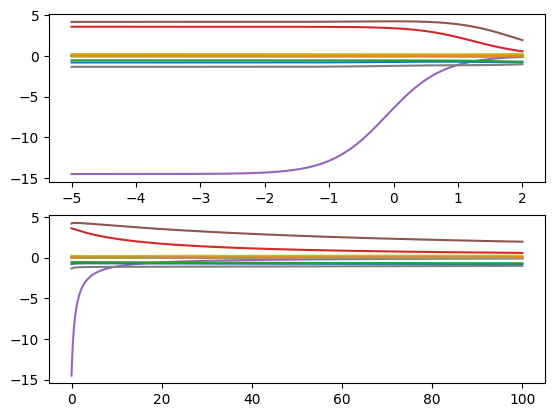

In [47]:
fig = plt.figure()
ax1=plt.subplot(2,1,1)
ax2=plt.subplot(2,1,2)
ax1.plot(lambda_list,ridge_coefficients)
ax2.plot(Lambdas,ridge_coefficients)
plt.show()


### In this ridge regression, when $\lambda$ increases a lot, the $R^2$ score has an decreasing trend.

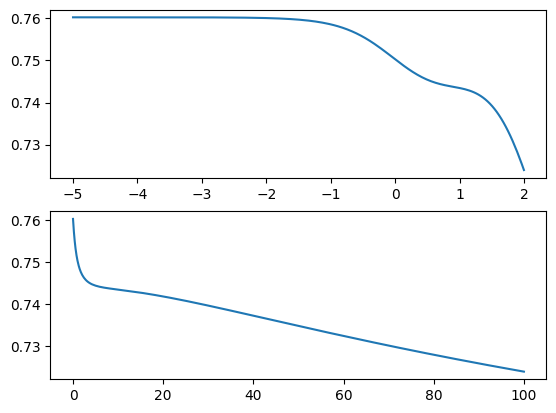

In [48]:
ax1=plt.subplot(2,1,1)
ax2=plt.subplot(2,1,2)
ax1.plot(lambda_list,score_list)
ax2.plot(Lambdas,score_list)
plt.show()

###  Method II for selecting best $\alpha$: Cross-Validation 交叉验证法确定$\lambda$值

![avatar](./cross_validation.png)

Details for class RidgeCV can be seen [here](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.RidgeCV.html#sklearn.linear_model.RidgeCV).

In [64]:
ridge_cv = RidgeCV(alphas=Lambdas,scoring='r2',cv=10)
# Alt+Z to see the whole text.
'''
The 'scoring' parameter of RidgeCV must be a str among {'neg_mean_absolute_percentage_error', 'positive_likelihood_ratio', 'average_precision', 'neg_mean_squared_log_error', 'f1_weighted', 'recall_macro', 'balanced_accuracy', 'neg_mean_absolute_error', 'f1', 'fowlkes_mallows_score', 'neg_mean_gamma_deviance', 'neg_mean_poisson_deviance', 'neg_mean_squared_error', 'roc_auc_ovr_weighted', 'rand_score', 'recall_samples', 'roc_auc_ovr', 'matthews_corrcoef', 'precision_samples', 'adjusted_mutual_info_score', 'roc_auc_ovo_weighted', 'jaccard_micro', 'max_error', 'neg_log_loss', 'f1_macro', 'roc_auc', 'jaccard_macro', 'neg_root_mean_squared_error', 'precision_macro', 'f1_samples', 'precision_micro', 'top_k_accuracy', 'roc_auc_ovo', 'neg_median_absolute_error', 'mutual_info_score', 'precision', 'explained_variance', 'homogeneity_score', 'completeness_score', 'recall_weighted', 'neg_brier_score', 'recall', 'jaccard_samples', 'precision_weighted', 'v_measure_score', 'jaccard', 'recall_micro', 'neg_negative_likelihood_ratio', 'adjusted_rand_score', 'normalized_mutual_info_score', 'jaccard_weighted', 'f1_micro', 'accuracy', 'r2'}
'''
ridge_cv.fit(X_train,y_train)
print("best score: ",ridge_cv.best_score_)
print("best alpha: ",ridge_cv.alpha_)
print("result regression coefficients: ",ridge_cv.coef_)

best score:  0.6906884936537497
best alpha:  16.83180353330955
result regression coefficients:  [-0.04050027  0.04097978 -0.02808358  1.84764554 -0.67895585  3.61389869
 -0.01309375 -1.13199722  0.20009543 -0.0111309  -0.73060689  0.01309111
 -0.59510974]
